<a href="https://colab.research.google.com/github/jacob-abe/AIlab/blob/master/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline
from stockai import Stock

td = Stock('TD.TO')
prices_list = td.get_historical_prices('2019-01-01', '2019-01-30')

df = pd.DataFrame.from_dict(prices_list)
df.head()

,high,close,low,volume,open,date,adjclose
0,68.430000,68.250000,67.120003,3930300,67.510002,2019-01-02,65.599342
1,68.110001,67.300003,67.120003,5407700,68.110001,2019-01-03,64.686241
2,68.150002,67.980003,67.669998,5103400,68.000000,2019-01-04,65.339836
3,68.589996,67.690002,67.449997,5907000,68.589996,2019-01-07,65.061096
4,68.190002,67.820000,67.330002,7337200,68.000000,2019-01-08,65.186050


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


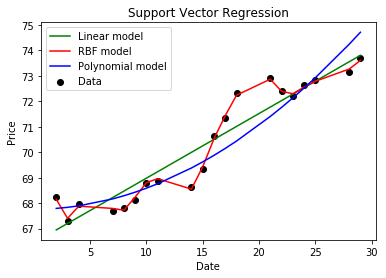

In [3]:
# Get data function
def get_data(df):  
    data = df.copy()
    data['date'] = data['date'].str.split('-').str[2]
    data['date'] = pd.to_numeric(data['date'])
    return [ data['date'].tolist(), data['close'].tolist() ]
dates, prices = get_data(df)

# predict and plot function
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1))
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    # Fit regression model
    svr_lin .fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]
predicted_price = predict_prices(dates, prices, [31])